In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from DATADIQ.projects.A_data_collection import make_dataset_for_classification
from DATADIQ.projects.D_data_analysis import classification 
from DATADIQ.projects.E_plot_results import plot

from DATADIQ import tane
import sys
sys.path.append('DATADIQ')
import fdtool

import warnings
warnings.filterwarnings('ignore')

seed = 2024

In [61]:
X, y = make_dataset_for_classification(n_samples=1000, n_features=5, n_informative=5, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, seed=seed)

df = pd.DataFrame(X)
df

,0,1,2,3,4
0,0.973723,2.804397,-0.300831,1.448791,0.553982
1,-0.958050,0.837400,0.938903,-0.545706,1.026823
2,-1.855599,-0.314043,0.126241,-2.888675,-1.110085
3,-0.093354,1.475853,1.444273,-0.480373,-2.266737
4,-0.100938,0.550623,-0.476341,-1.265839,1.399365
...,...,...,...,...,...
995,-1.498142,-1.000903,-2.849355,-3.339761,0.317906
996,2.610183,-0.963824,3.156669,-0.279722,-0.791273
997,-2.555454,1.851760,2.927063,0.148744,-1.061322
998,0.753282,-1.641176,5.510577,-1.396730,-1.304814


In [62]:
#pollute the dataset adding functional dependencies
def pollute(data, correlation_coefficient, new_feautures_number):
    df = data.copy()
    for i in range(new_feautures_number):
        dependent_column_name = np.random.choice(df.columns)
        column_name = 'new_feature_' + str(df.shape[1]-4)
        df[column_name] = correlation_coefficient * df[dependent_column_name] + np.sqrt(1 - correlation_coefficient**2) * np.random.normal(0, 1.5, size=df.shape[0])
        print('new feature added: ' + column_name +' dependent on '+ str(dependent_column_name))
    print("\n")
    return df

In [63]:
polluted = []

polluted.append(pollute(df, 0.7, 1))
polluted.append(pollute(df, 0.7, 2))
polluted.append(pollute(df, 0.8, 3))
polluted.append(pollute(polluted[1], 0.75, 2))
polluted.append(pollute(df, 0.8, 2))
polluted.append(pollute(df, 0.85, 1))
polluted.append(pollute(df, 0.9, 1))
polluted.append(pollute(df, 0.9, 2))
polluted.append(pollute(df, 0.9, 3))
polluted.append(pollute(df, 0.95, 1))



new feature added: new_feature_1 dependent on 4


new feature added: new_feature_1 dependent on 3
new feature added: new_feature_2 dependent on 2


new feature added: new_feature_1 dependent on 2
new feature added: new_feature_2 dependent on 2
new feature added: new_feature_3 dependent on new_feature_2


new feature added: new_feature_3 dependent on 1
new feature added: new_feature_4 dependent on 3


new feature added: new_feature_1 dependent on 4
new feature added: new_feature_2 dependent on 1


new feature added: new_feature_1 dependent on 3


new feature added: new_feature_1 dependent on 3


new feature added: new_feature_1 dependent on 3
new feature added: new_feature_2 dependent on 3


new feature added: new_feature_1 dependent on 0
new feature added: new_feature_2 dependent on 1
new feature added: new_feature_3 dependent on 2


new feature added: new_feature_1 dependent on 0




In [64]:
correlation=polluted[0].corr()
correlation.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,new_feature_1
0,1.000000,0.259794,0.049182,-0.102016,-0.047749,-0.011176
1,0.259794,1.000000,0.135795,-0.138170,0.261565,0.163969
2,0.049182,0.135795,1.000000,-0.043446,-0.162988,-0.126599
3,-0.102016,-0.138170,-0.043446,1.000000,-0.126358,-0.096446
4,-0.047749,0.261565,-0.162988,-0.126358,1.000000,0.692602
new_feature_1,-0.011176,0.163969,-0.126599,-0.096446,0.692602,1.000000


IndexError: index 6 is out of bounds for axis 0 with size 6

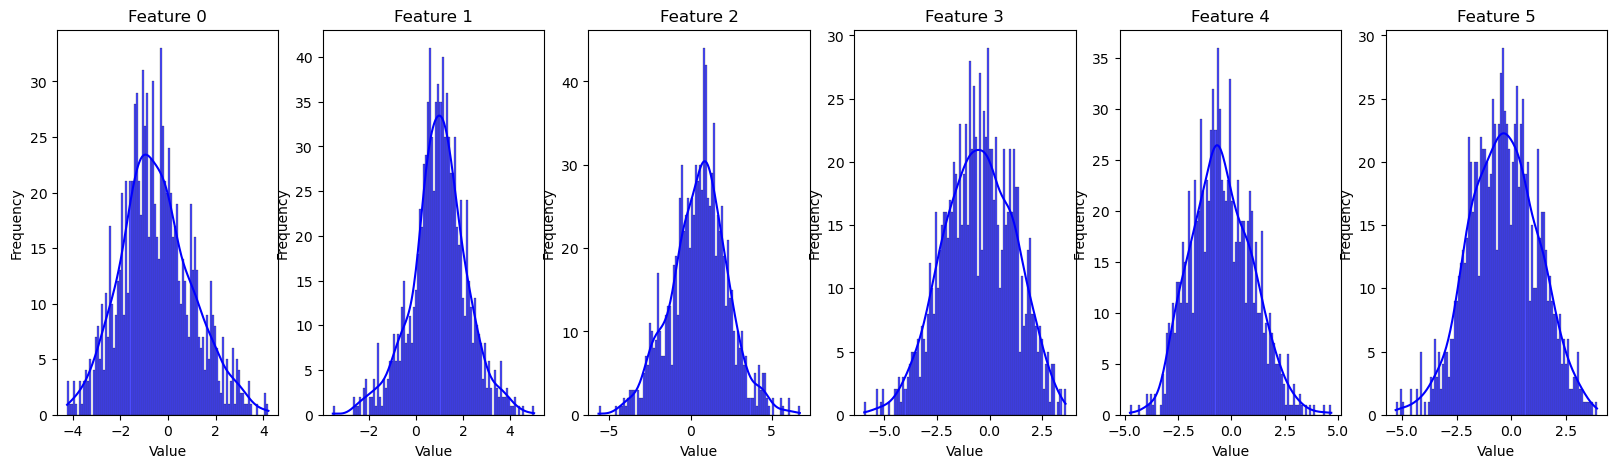

In [67]:
#create a subplot with 1 row and 5 columns
fig, axs = plt.subplots(1, 6, figsize=(20,5))


polluted_df = polluted[3]
#plot the histograms of the first 5 features of the polluted dataframe

for i in range(polluted_df.shape[1]):
    #plot a row of histograms with the distribution of the features
    axs[i].set_title('Feature '+ str(i))
    sns.histplot(polluted_df.iloc[:,i], bins=100,color='blue', kde = True, alpha=0.7, label='X', edgecolor='black', ax=axs[i])
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')
plt.show()


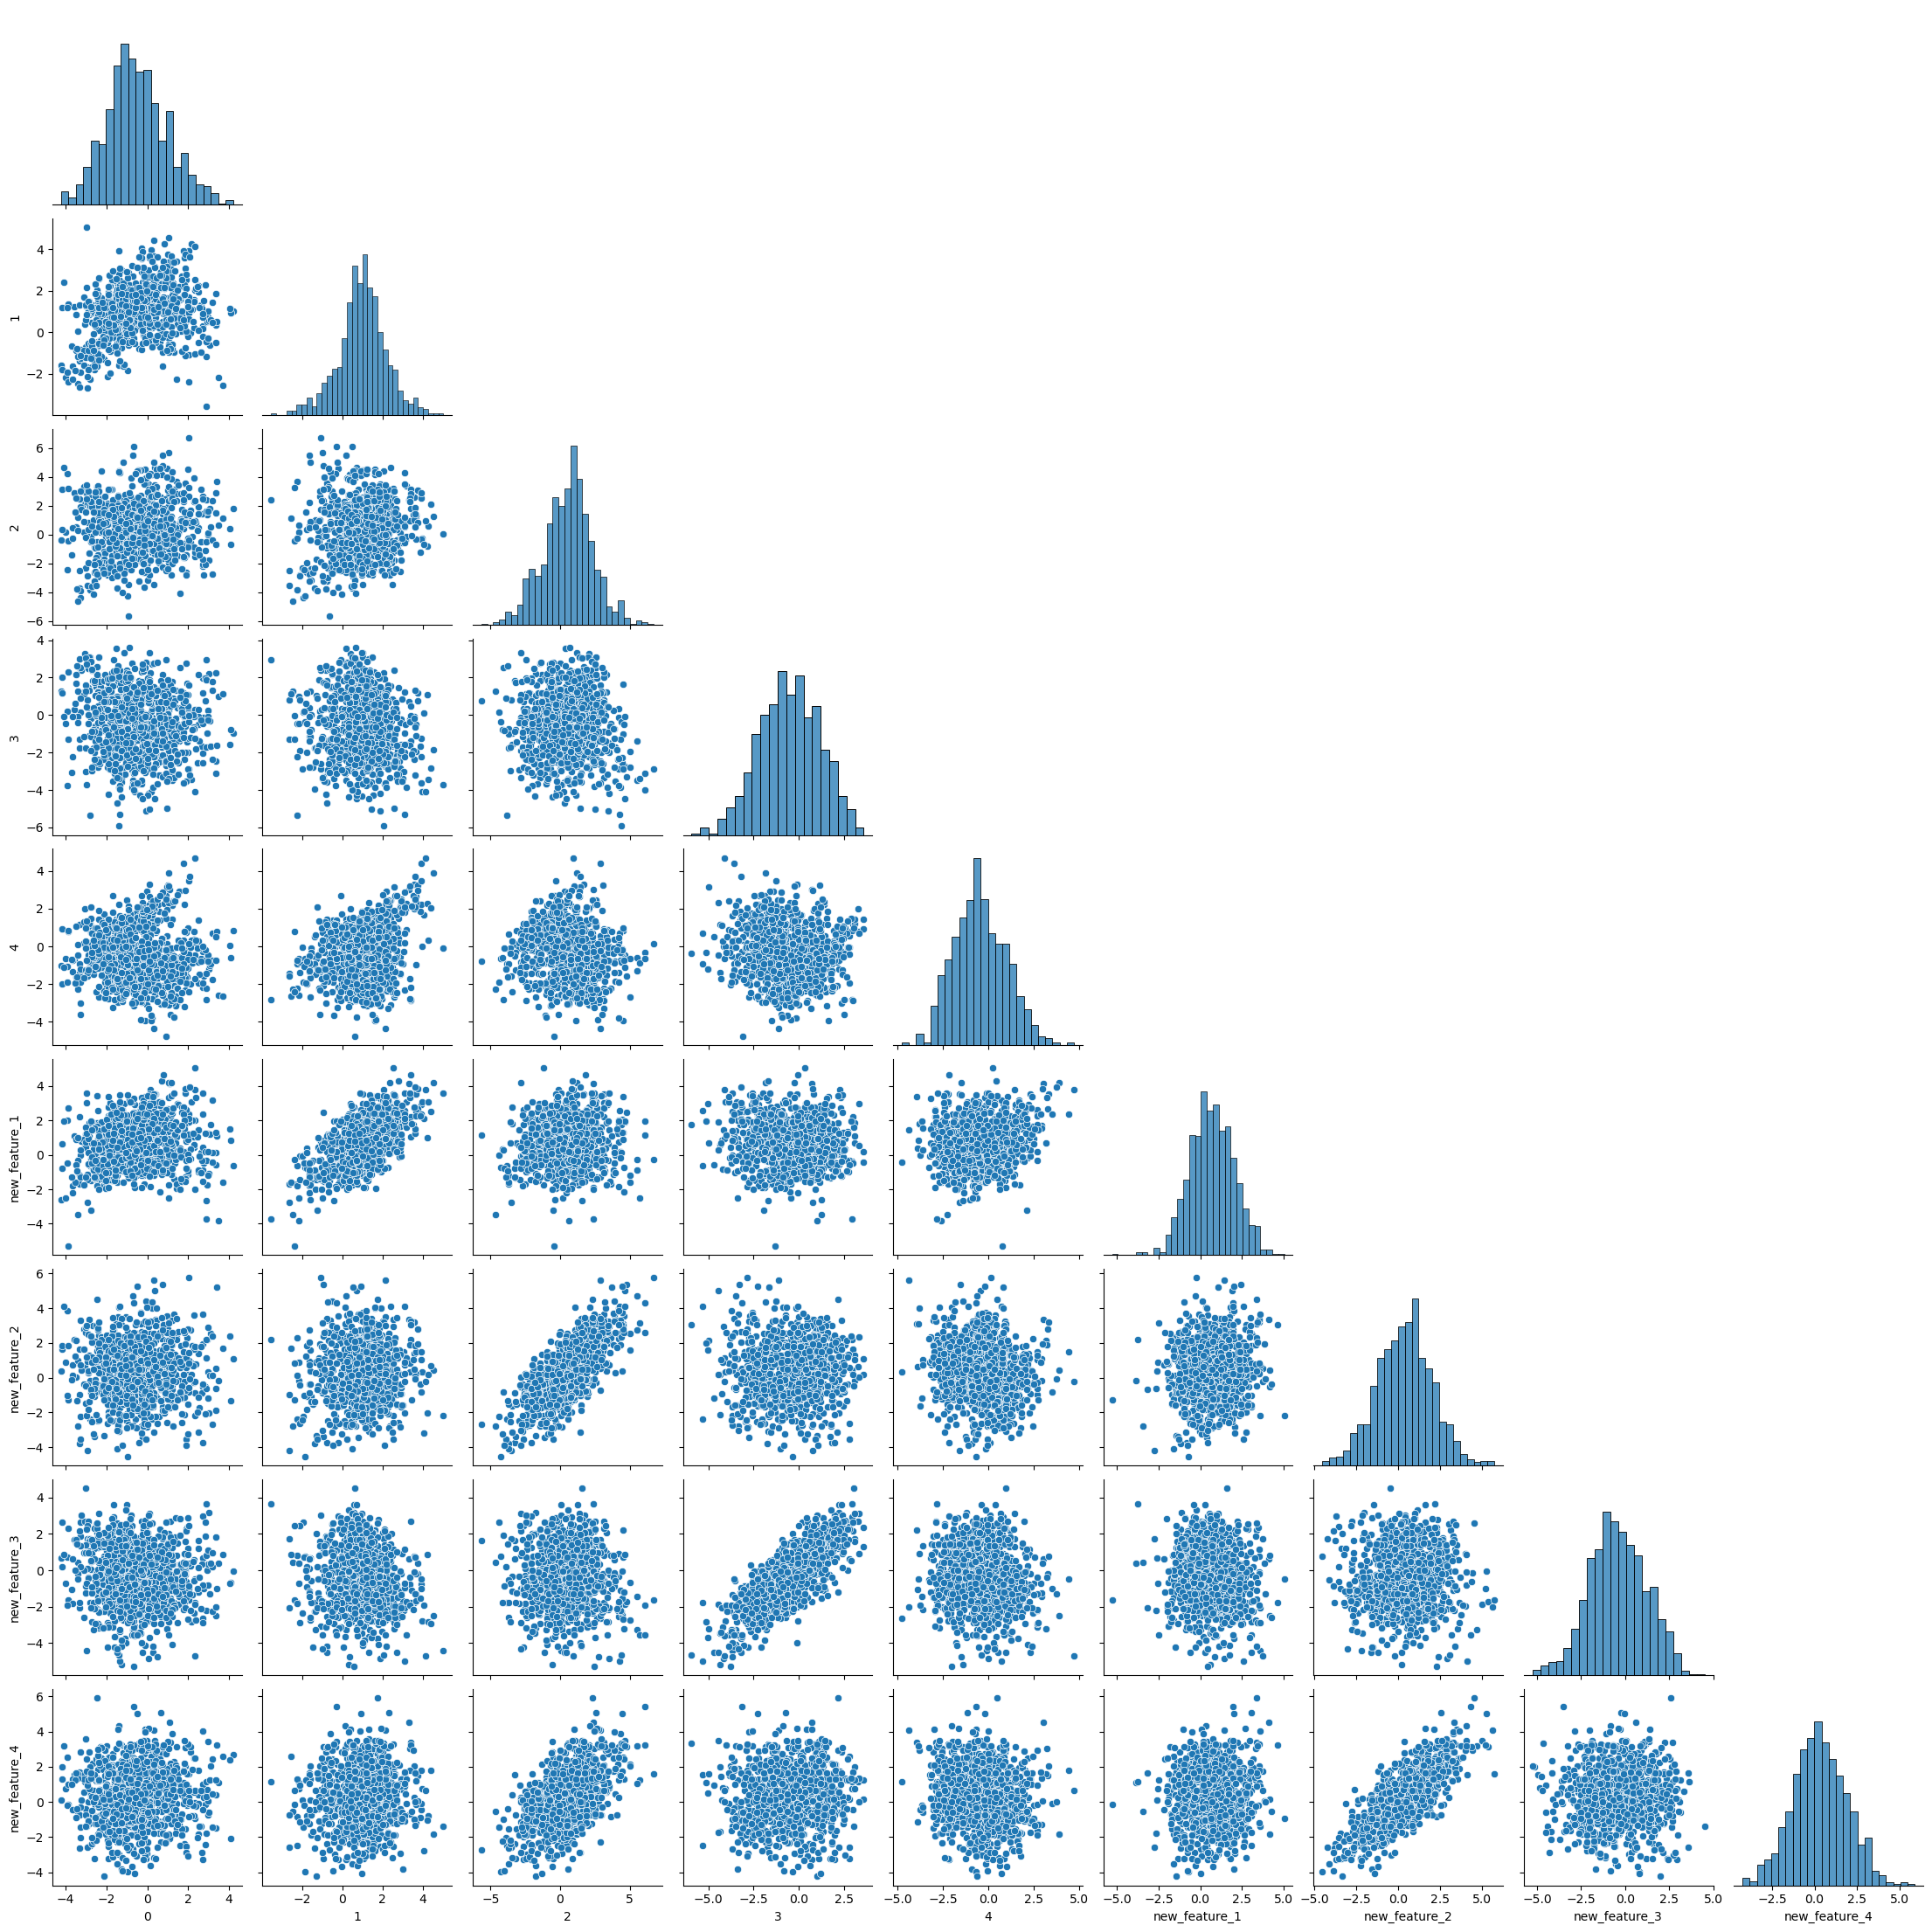

In [ ]:
#plot the pairplot
sns.pairplot(polluted_df, diag_kind='hist', corner=True)
plt.show()

Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for RandomForest...
Training for RandomForest...
Training for RandomForest...
Training for RandomForest...
Training for RandomForest...
Training for Ra

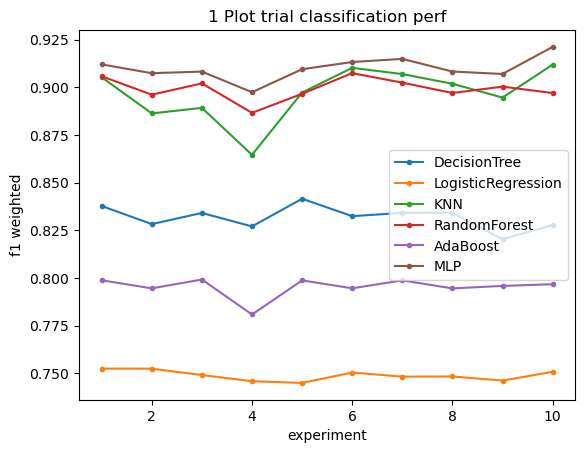

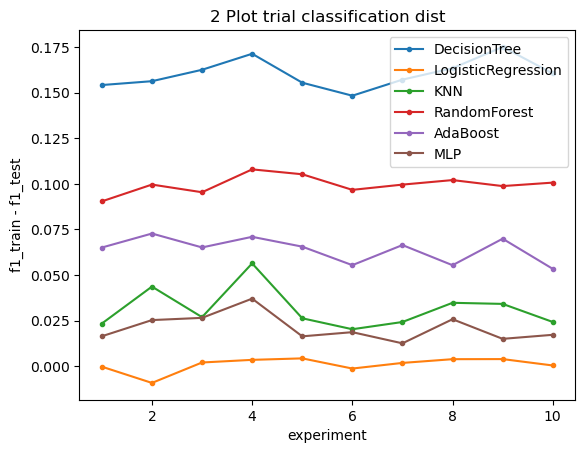

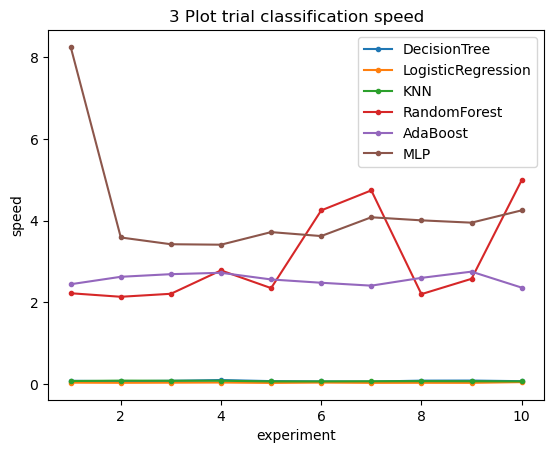

In [ ]:
CLASSIFICATION_ALGORITHMS = ["DecisionTree","LogisticRegression","KNN","RandomForest","AdaBoost","MLP"]
results_for_each_algorithm = []
for algorithm in CLASSIFICATION_ALGORITHMS: # FIRST CICLE ON THE ALGORITHMS

    results_single_algorithm = []

    for df in polluted: # SECOND CICLE ON THE NUMBER OF POLLUTED DATASET THAT YOU WANT TO CREATE WITH DIFFERENT % OF POLLUTION
        # DATA ANALYSIS
        df.columns = [str(i) for i in range(df.shape[1])]
        results_1_analysis = classification(df, y, algorithm, seed)
        results_single_algorithm.append(results_1_analysis)

    results_for_each_algorithm.append(results_single_algorithm)

# RESULTS EVALUATION
#EXAMPLE FOR USING THE SCRIPTS TO PLOT THE RESULTS
plot(x_axis_values=[1,2,3,4,5,6,7,8,9,10], x_label="experiment", results=results_for_each_algorithm, title="1 Plot trial classification perf", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=[1,2,3,4,5,6,7,8,9,10], x_label="experiment", results=results_for_each_algorithm, title="2 Plot trial classification dist", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=[1,2,3,4,5,6,7,8,9,10], x_label="experiment", results=results_for_each_algorithm, title="3 Plot trial classification speed", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="speed")

In [ ]:
#for each element in polluted, create a csv file with the data
for experiment in polluted:
    experiment.columns = [str(i) for i in range(experiment.shape[1])]
    
    
for i in range(len(polluted)):
    polluted[i].to_csv('datasets/polluted_dataset_'+str(i)+'.csv', index=False)

In [ ]:
#tane
for experiment in range(len(polluted)):
    print("EXPERIMENT: "+str(experiment))
    source = 'datasets/polluted_dataset_'+str(experiment)+'.csv'
    tane.compute(source)
    print("\n")


EXPERIMENT: 0
List of all FDs:  [['0', '3'], ['0', '4'], ['0', '2'], ['0', '1'], ['0', '5'], ['1', '3'], ['1', '4'], ['1', '2'], ['1', '0'], ['1', '5'], ['2', '3'], ['2', '4'], ['2', '1'], ['2', '0'], ['2', '5'], ['3', '4'], ['3', '2'], ['3', '1'], ['3', '0'], ['3', '5'], ['4', '3'], ['4', '2'], ['4', '1'], ['4', '0'], ['4', '5'], ['5', '3'], ['5', '4'], ['5', '2'], ['5', '1'], ['5', '0']]
Total number of FDs found:  30


EXPERIMENT: 1
List of all FDs:  [['0', '3'], ['0', '4'], ['0', '2'], ['0', '1'], ['0', '5'], ['0', '6'], ['1', '3'], ['1', '4'], ['1', '2'], ['1', '0'], ['1', '5'], ['1', '6'], ['2', '3'], ['2', '4'], ['2', '1'], ['2', '0'], ['2', '5'], ['2', '6'], ['3', '4'], ['3', '2'], ['3', '1'], ['3', '0'], ['3', '5'], ['3', '6'], ['4', '3'], ['4', '2'], ['4', '1'], ['4', '0'], ['4', '5'], ['4', '6'], ['5', '3'], ['5', '4'], ['5', '2'], ['5', '1'], ['5', '0'], ['5', '6'], ['6', '3'], ['6', '4'], ['6', '2'], ['6', '1'], ['6', '0'], ['6', '5']]
Total number of FDs found:  42


EXPE

In [ ]:
for experiment in polluted:
    print(experiment.nunique())

0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
dtype: int64
0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
dtype: int64
0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
dtype: int64
0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
8    1000
dtype: int64
0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
dtype: int64
0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
dtype: int64
0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
dtype: int64
0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
dtype: int64
0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
dtype: int64
0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
dtype: int64
